In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style("whitegrid")

In [3]:
def hypothesis(x,theta):
#    return(np.dot(x,theta.T))
#    return(x@theta.T)
    return ([theta[0]+theta[1]*i for i in x['Economy..GDP.per.Capita.']])

In [4]:
def cost_linear(x,y,theta):
    err = math.sqrt(mean_squared_error(hypothesis(x,theta),y))
    return (err)

In [5]:
def gradient(diff,x_attr):
    tot_gradient = np.dot(diff,x_attr)
    return((1/m)*tot_gradient)

In [22]:
def gradient_descent(x,y,theta):
    parameter_list = []
    loss_list = []
    theta_0 = theta[0]
    theta_1 = theta[1]
    lr = 0.01
    n_iters = 0
    cost = cost_linear(x,y,theta)
    #for i in range(25000):
    while(1):
        parameter_list.append(theta)
        
        old = cost
        loss_list.append(cost)
        diff = hypothesis(x,theta)-y
        theta_0 = theta_0 - lr * gradient(diff,x['x_0'])
        theta_1 = theta_1 - lr * gradient(diff,x['Economy..GDP.per.Capita.'])
        theta = np.array([theta_0,theta_1])
        
        cost = cost_linear(x,y,theta)
        
        if((old-cost)<0.00001):
            loss_list.append(cost)
            parameter_list.append(theta)
            return theta,loss_list,parameter_list
    #return theta,loss_list,parameter_list

In [7]:
def gradient_descent(x,y,theta):
    parameter_list = []
    loss_list = []
    theta_0 = theta[0]
    theta_1 = theta[1]
    lr = 0.001
    n_iters = 0
    cost = cost_linear(x,y,theta)
    for i in range(25000):
    #while(1):
        parameter_list.append(theta)
        
        old = cost
        loss_list.append(cost)
        diff = hypothesis(x,theta)-y
        theta_0 = theta_0 - lr * gradient(diff,x['x_0'])
        theta_1 = theta_1 - lr * gradient(diff,x['Economy..GDP.per.Capita.'])
        theta = np.array([theta_0,theta_1])
        
        cost = cost_linear(x,y,theta)
        
    #    if((old-cost)<0.00001):
     #       loss_list.append(cost)
      #      parameter_list.append(theta)
       #     return theta,loss_list,parameter_list
    return theta,loss_list,parameter_list

#### Ridge Regression

In [560]:
def gradient_descent(x,y,theta):
    lamda = 35
    parameter_list = []
    loss_list = []
    theta_0 = theta[0]
    theta_1 = theta[1]
    lr = 0.01
    n_iters = 0
    cost = cost_linear(x,y,theta)
    #for i in range(25000):
    while(1):
        parameter_list.append(theta)
        
        old = cost
        loss_list.append(cost)
        diff = hypothesis(x,theta)-y
        theta_0 = theta_0 - lr * gradient(diff,x['x_0'])
        theta_1 = theta_1 *(1 - lr*(lamda)/m) - lr * gradient(diff,x['Economy..GDP.per.Capita.'])
        theta = np.array([theta_0,theta_1])
        
        cost = cost_linear(x,y,theta)
        
        if((old-cost)<0.000001):
            loss_list.append(cost)
            parameter_list.append(theta)
            return theta,loss_list,parameter_list
    #return theta,loss_list,parameter_list

In [561]:
data = pd.read_csv(r"F:/bda/datasets/world-happiness/2017.csv")

In [562]:
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [616]:
x = data[['Economy..GDP.per.Capita.']]
y = data['Happiness.Score']

In [617]:
m = len(x)
m

155

In [623]:
x.T.iloc[0,:]

0      1.616463
1      1.482383
2      1.480633
3      1.564980
4      1.443572
         ...   
150    0.368746
151    0.777153
152    0.511136
153    0.091623
154    0.000000
Name: Economy..GDP.per.Capita., Length: 155, dtype: float64

In [618]:
x['x_0'] = 1

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [566]:
#xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [567]:
theta = np.array([7,8])

In [568]:
#theta_hat,loss_list,parameter_list = gradient_descent(x,y,theta)

In [569]:
theta_hat,loss_list,parameter_list = gradient_descent(xtrain,ytrain,theta)

loss_list

In [571]:
loss_list[-2],loss_list[-1]     #### training error

(0.6451541657739187, 0.6451730725972585)

In [572]:
np.min(loss_list)    ## training error

0.6451541657739187

In [573]:
np.argsort(loss_list)[:2]

array([212, 213], dtype=int64)

#parameter_list[3163],parameter_list[3162]

parameter_list

In [576]:
theta_hat     ### theta values for training

array([3.26738899, 2.08056954])

In [577]:
lr.intercept_,lr.coef_

(3.1051278972106857, array([2.22351535]))

In [578]:
y_pred_train = hypothesis(xtrain,theta_hat)

In [579]:
math.sqrt(mean_squared_error(y_pred_train,ytrain))

0.6451730725972585

In [580]:
y_pred_test = hypothesis(xtest,theta_hat)

In [581]:
math.sqrt(mean_squared_error(y_pred_test,ytest))

0.6925654011893405

In [582]:
### without regularization plot lambda =2  for training data
#plt.plot(xtrain['Economy..GDP.per.Capita.'],y_pred_train)
##plt.scatter(xtrain['Economy..GDP.per.Capita.'],ytrain)
#plt.show()

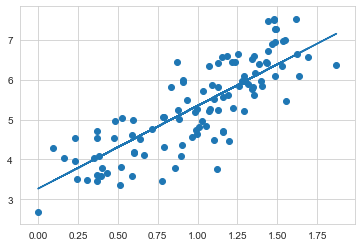

In [583]:
## for training
plt.plot(xtrain['Economy..GDP.per.Capita.'],y_pred_train)
plt.scatter(xtrain['Economy..GDP.per.Capita.'],ytrain)
plt.show()

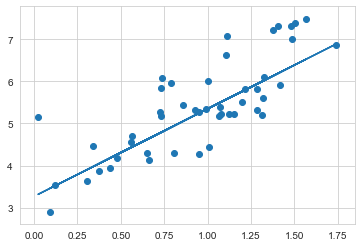

In [584]:
plt.plot(xtest['Economy..GDP.per.Capita.'],y_pred_test)
plt.scatter(xtest['Economy..GDP.per.Capita.'],ytest)
plt.show()

In [585]:
theta1 = [parameter_list[i][1] for i in range(len(parameter_list))]

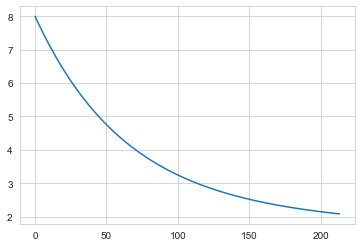

In [586]:
plt.plot(range(len(parameter_list)),theta1)
plt.show()

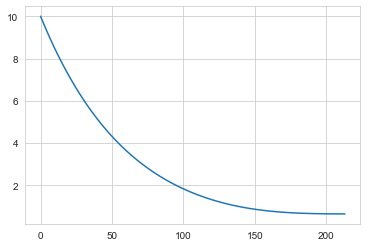

In [587]:
plt.plot(range(len(parameter_list)),loss_list)
plt.show()

In [588]:
len(parameter_list)

214

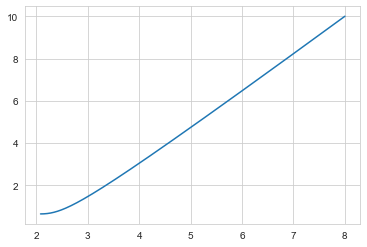

In [589]:
plt.plot(theta1,loss_list)
plt.show()

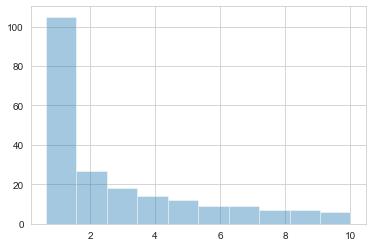

In [590]:
sns.distplot(loss_list,kde=False,bins=10)
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
X = data['Economy..GDP.per.Capita.'].values.reshape(-1,1)
Y = data['Happiness.Score']

In [268]:
lr.fit(xtrain['Economy..GDP.per.Capita.'].values.reshape(-1,1),ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [269]:
Y_Pred_train = lr.predict(xtrain['Economy..GDP.per.Capita.'].values.reshape(-1,1))

In [270]:
Y_Pred_test = lr.predict(xtest['Economy..GDP.per.Capita.'].values.reshape(-1,1))

In [271]:
math.sqrt(mean_squared_error(Y_Pred_train,ytrain))

0.6420807955044255

In [272]:
math.sqrt(mean_squared_error(Y_Pred_test,ytest))

0.700253406696889

In [273]:
lr.intercept_,lr.coef_

(3.1051278972106857, array([2.22351535]))

In [212]:
theta_hat

array([2.92892802, 2.36351887])

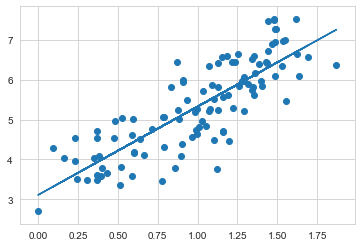

In [237]:
plt.plot(xtrain['Economy..GDP.per.Capita.'],Y_Pred_train)
plt.scatter(xtrain['Economy..GDP.per.Capita.'],ytrain)
plt.show()

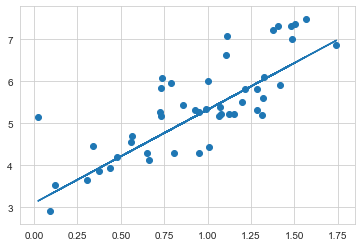

In [239]:
plt.plot(xtest['Economy..GDP.per.Capita.'],Y_Pred_test)
plt.scatter(xtest['Economy..GDP.per.Capita.'],ytest)
plt.show()

In [611]:
a = [1,2,3,8]
x,b,c,d= enumerate(a)

In [614]:
for (x,c) in enumerate(a):
    print(x,c)
    #print(i)

0 1
1 2
2 3
3 8
